
Introduction

In this comprehensive analysis, we delve into the intricate world of the S&P 500, focusing specifically on the performance of select tech giants: Apple, Amazon, Google, and Microsoft. Leveraging Python's powerful data analysis libraries such as Pandas, NumPy, Matplotlib, and Seaborn, we aim to unravel the complexities of stock market data. Our journey begins by sourcing individual stock data spanning five years, providing us with a rich dataset to explore various aspects of stock market dynamics.

Our analysis encompasses multiple layers, starting with a basic exploration of stock prices over time. We investigate key metrics like closing prices and apply technical analysis tools such as moving averages to smooth out price fluctuations and gain insights into trends. The moving average, a crucial component of our study, offers a lens to view the stock's momentum over specific time intervals.

Additionally, we explore the concept of daily returns, which sheds light on the stock's volatility and investment potential. Our approach is not just limited to traditional methods; we also incorporate modern visualization tools like Plotly to present our findings in a more interactive and engaging format.

As we dive deeper, we employ resampling techniques to analyze closing prices on different time scales—monthly, quarterly, and yearly. This approach allows us to discern patterns and trends that are not immediately apparent in daily data.

The crux of our analysis, however, lies in performing a multivariate analysis. Here, we examine the interrelationships between the stocks of these major tech companies. By exploring correlations, identifying clusters, and spotting outliers, we gain a nuanced understanding of how these stocks interact and influence each other in the complex ecosystem of the stock market.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import glob

In [7]:
len(glob.glob('/Users/zakariefarah/Downloads/S&P_resources/individual_stocks_5yr/*csv'))#Open the file package and count the number of stock CSV's

505

In [8]:
glob.glob(r'/Users/zakariefarah/Downloads/S&P_resources/individual_stocks_5yr/*csv')
company_list=[
    r'/Users/zakariefarah/Downloads/S&P_resources/individual_stocks_5yr/AAPL_data.csv',
    r'/Users/zakariefarah/Downloads/S&P_resources/individual_stocks_5yr/AMZN_data.csv',
    r'/Users/zakariefarah/Downloads/S&P_resources/individual_stocks_5yr/GOOG_data.csv',
    r'/Users/zakariefarah/Downloads/S&P_resources/individual_stocks_5yr/MSFT_data.csv'



]

In [9]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [10]:
all_data = pd.DataFrame()  # Initialize an empty DataFrame

for file in company_list:#Iterate through the file paths and read them into current_df
    current_df = pd.read_csv(file)#Then Append current_df into the empty dataframe all_data
    all_data = all_data.append(current_df, ignore_index=True)

In [11]:
all_data.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [12]:
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

What was the change in price of the stock over time?

In [13]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [14]:
all_data.dtypes#Convert the object data type to datetime64[ns] to plot the graph

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [15]:
all_data['date']= pd.to_datetime(all_data['date'])
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]

In [16]:
tech_comp=all_data['Name'].unique()

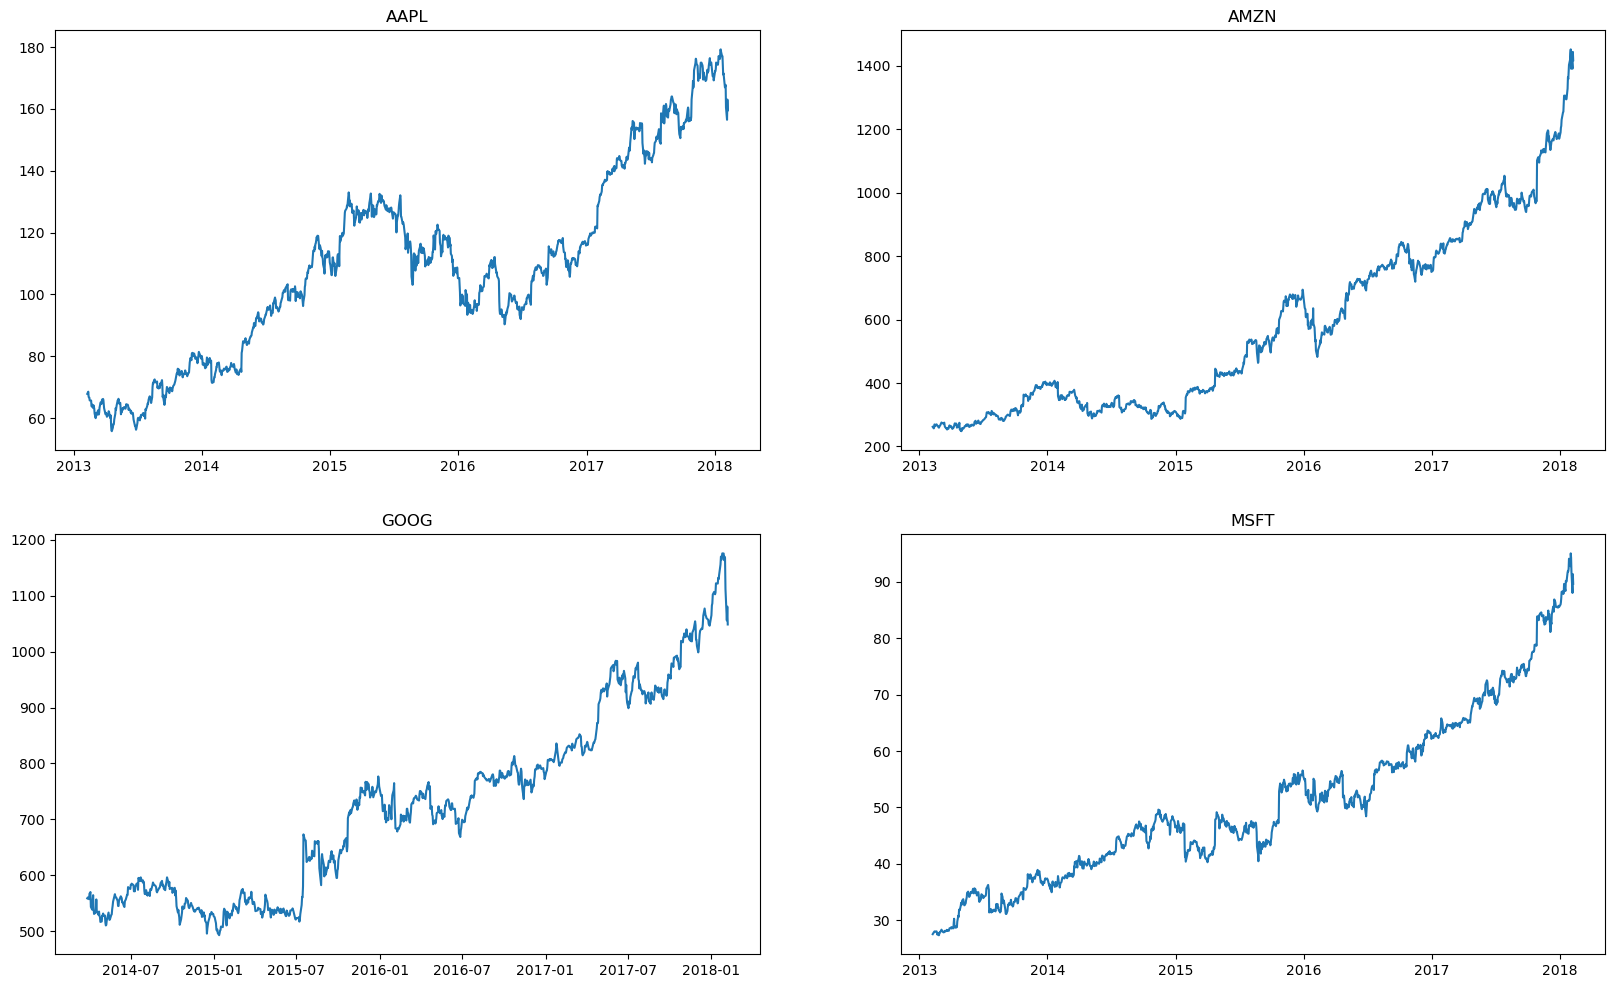

In [17]:
# Set the size of the entire figure
plt.figure(figsize=(20, 12))

# Create subplots in a 2x2 grid for each tech company
for index, company in enumerate(tech_comp, start=1):
    # Set the current subplot based on the index
    plt.subplot(2, 2, index)
    
    # Filter the data for the current company
    filter1 = all_data['Name'] == company
    df = all_data[filter1]
    
    # Plot the 'close' prices over time for the current company
    plt.plot(df['date'], df['close'])
    
    # Set the title of the subplot to the company name
    plt.title(company)

# Display the figure with subplots
plt.show()

Looking at the stocks over time, we can see the growth of these big tech compaies through the mid to late 2010's. Amazon and Google mirror eachother as they've had a smooth slope up. The next question throughout this exploratory data analysis is, what was the moving average of the various stocks available? A moving average (MA) is a technical analysis indicator that helps level price action by filtering out the noise from random price fluctuations. It helps you to study trends over a ser time interval.

In [18]:
all_data['close'].rolling(window=10).mean().head(14)#moving average starts at the 10th row

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

In [19]:
new_data= all_data.copy()

In [20]:
ma_day= [10, 20, 30]

for ma in ma_day:#Convert the ma into a string using str to make the colomn names
    new_data['close_'+str(ma)]= new_data['close'].rolling(ma).mean()

In [21]:
new_data.tail(7)

date   open    high      low  close    volume  Name  close_10  \
4745 2018-01-30  93.30  93.660  92.1000  92.74  38635053  MSFT    91.862   
4746 2018-01-31  93.75  95.400  93.5100  95.01  48756338  MSFT    92.349   
4747 2018-02-01  94.79  96.070  93.5813  94.26  47227882  MSFT    92.765   
4748 2018-02-02  93.64  93.970  91.5000  91.78  47867753  MSFT    92.943   
4749 2018-02-05  90.56  93.240  88.0000  88.00  51031465  MSFT    92.582   
4750 2018-02-06  86.89  91.475  85.2500  91.33  67998564  MSFT    92.525   
4751 2018-02-07  90.49  91.770  89.2000  89.61  41107592  MSFT    92.304   

      close_20   close_30  
4745   89.8285  88.484333  
4746   90.2815  88.756333  
4747   90.6770  89.019000  
4748   90.9105  89.217333  
4749   90.9010  89.300000  
4750   91.0535  89.494333  
4751   91.1230  89.631000

In [22]:
new_data.set_index('date', inplace=True)

In [23]:
new_data

open     high      low    close     volume  Name  close_10  \
date                                                                        
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL       NaN   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL       NaN   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL       NaN   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL       NaN   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL       NaN   
...             ...      ...      ...      ...        ...   ...       ...   
2018-02-01  94.7900  96.0700  93.5813  94.2600   47227882  MSFT    92.765   
2018-02-02  93.6400  93.9700  91.5000  91.7800   47867753  MSFT    92.943   
2018-02-05  90.5600  93.2400  88.0000  88.0000   51031465  MSFT    92.582   
2018-02-06  86.8900  91.4750  85.2500  91.3300   67998564  MSFT    92.525   
2018-02-07  90.4900  91.7700  89.2000  89.6100   41107592  MSFT    92.304   

            close_20   close_30  
date                             
2013-02-08       NaN        NaN  
2013-02-11       NaN        NaN  
2013-02-12       NaN        NaN  
2013-02-13       NaN        NaN  
2013-02-14       NaN        NaN  
...              ...        ...  
2018-02-01   90.6770  89.019000  
2018-02-02   90.9105  89.217333  
2018-02-05   90.9010  89.300000  
2018-02-06   91.0535  89.494333  
2018-02-07   91.1230  89.631000  

[4752 rows x 9 columns]

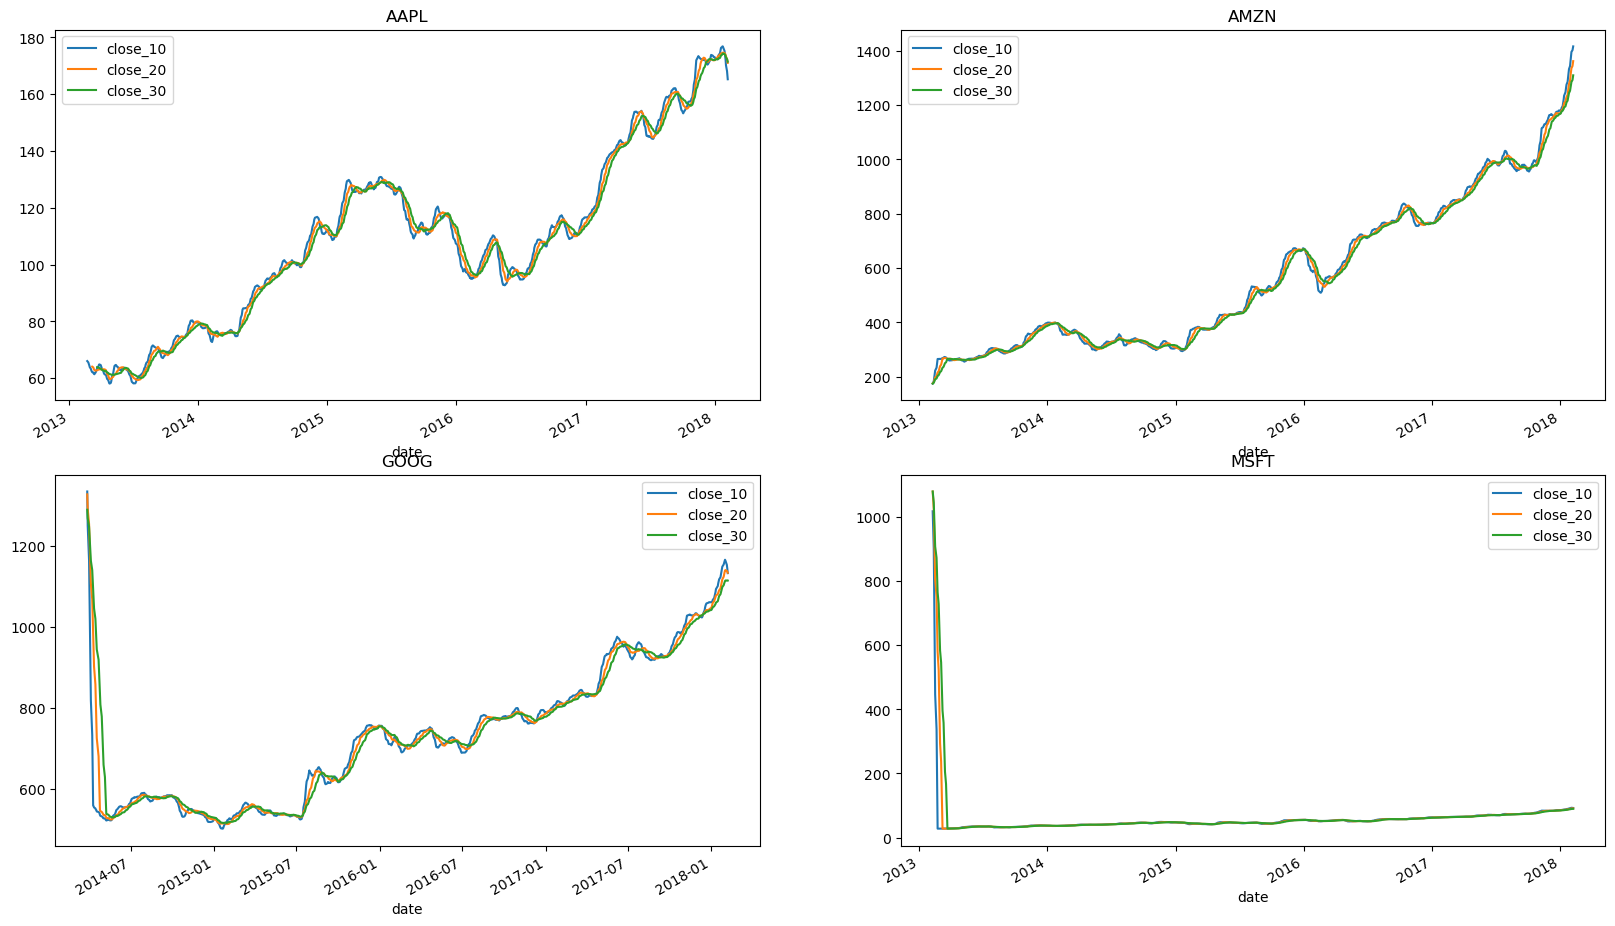

In [24]:
# Set the size of the entire figure
plt.figure(figsize=(20, 12))

# Create subplots in a 2x2 grid for each tech company
for index, company in enumerate(tech_comp, start=1):
    plt.subplot(2, 2, index)
    filter1 = new_data['Name'] == company
    df = new_data[filter1]
    
    # Plot using a pandas lineplot instead of a matplotlib code that we used last time 
    df[['close_10','close_20','close_30']].plot(ax=plt.gca())
    
    
    plt.title(company)

plt.show()

Closely packed moving averages may suggest a period of low volatility in the stock price. If the lines are not diverging widely, it could indicate a stable and less volatile market. Also Closely packed moving averages may reflect a consensus in the market sentiment. Traders and investors may be interpreting the stock's performance similarly across different time frames.

In [25]:
apple= pd.read_csv(r'/Users/zakariefarah/Downloads/S&P_resources/individual_stocks_5yr/AAPL_data.csv')

In [26]:
apple['Daily return in(%)']= apple['close'].pct_change()*100
apple

date      open      high       low     close     volume  Name  \
0     2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL   
1     2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL   
2     2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL   
3     2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL   
4     2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL   
...          ...       ...       ...       ...       ...        ...   ...   
1254  2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL   
1255  2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL   
1256  2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL   
1257  2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL   
1258  2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL   

      Daily return in(%)  
0                    NaN  
1               1.042235  
2              -2.506658  
3              -0.190297  
4              -0.089934  
...                  ...  
1254            0.209043  
1255           -4.339015  
1256           -2.498442  
1257            4.179181  
1258           -2.140710  

[1259 rows x 8 columns]

In [27]:
import plotly.express as px
px.line(apple,x='date', y='Daily return in(%)')

We can see in this graph what was confirmed in our previous moving average analysis, this is not a volatile stock. We can also interpret that traders also notice this pattern even though we can see some outliers off this graph. An assumption can be made to buy and sell in quarters as theres usually an unprecedented high closing point every couple months.

# Resampling Analysis of Closing Prices

Sampling analysis of a stock's closing prices on a yearly, quarterly, and monthly basis involves selecting representative subsets of data from the historical stock price data to gain insights into various aspects of the stock's performance over different time frames. 

In [28]:
apple.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily return in(%)    float64
dtype: object

In [29]:
apple['date'] =pd.to_datetime(apple['date'])#Need row index and datetime(ns) to use the pandas plot

In [30]:
apple.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return in(%)           float64
dtype: object

In [31]:
apple.set_index('date', inplace=True)#setting the 'date' column as the index for a DataFrame in pandas


In [32]:
apple.head(2)

open     high      low    close     volume  Name  \
date                                                              
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   

            Daily return in(%)  
date                            
2013-02-08                 NaN  
2013-02-11            1.042235

<Axes: xlabel='date'>

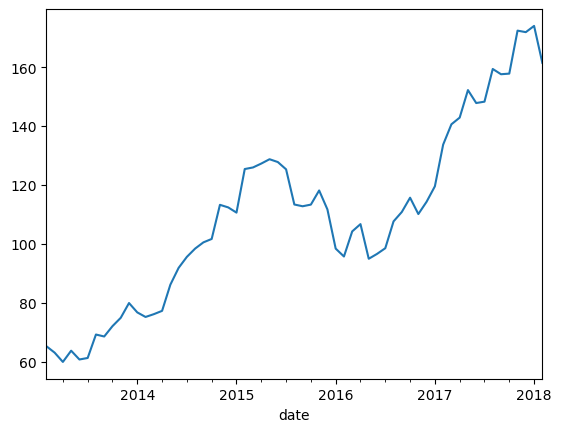

In [33]:
apple['close'].resample('M').mean().plot()#Resample by month to get the average closing price to plot 

<Axes: xlabel='date'>

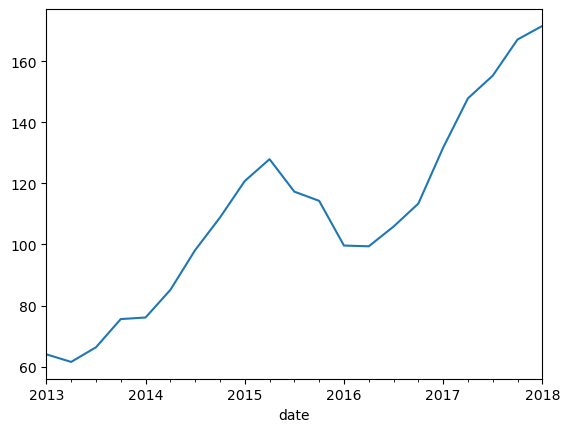

In [34]:
apple['close'].resample('Q').mean().plot()#Quaterly basis

<Axes: xlabel='date'>

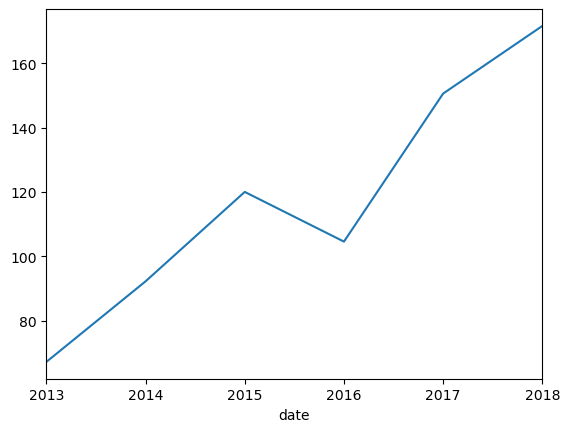

In [35]:
apple['close'].resample('Y').mean().plot()#Now we plot on a yearly basis

The first notable insight from this plot is that there has been an upward trend for every quarter post 2016 and it continues to it's peak in 2018. This shows a level of steady growth for a large sample considering the negaative trend the year prior. Comparing Apple's decisions pre and post 2016 can give you better insights on what's driving this success.

# Perform Multivariate Analysis

Are the closing prices of some of these tech companies closely related? We will perform multivariate analysis to check on Co-realtions between these companies. 
Key things to look for:

Correlation: If points in the scatterplots trend upward or downward, it suggests a positive or negative correlation between the two variables.
Clusters: Look for clusters of points, which may indicate groups or patterns in the data.
Outliers: Identify any points that deviate significantly from the general trend.
Remember, correlation does not imply causation, so additional analysis and context are often necessary to draw meaningful conclusions. Additionally, you can customize the pairplot further, such as adding regression lines or controlling the color palette, to enhance your analysis.

In [36]:
app=pd.read_csv(company_list[0])
amzn=pd.read_csv(company_list[1])
goog=pd.read_csv(company_list[2])
msft=pd.read_csv(company_list[3])

In [37]:
closing_price=pd.DataFrame()

In [38]:
closing_price['msft_close']=msft['close']
closing_price['amzn_close']=amzn['close']
closing_price['goog_close']=goog['close']
closing_price['aapl_close']=app['close']

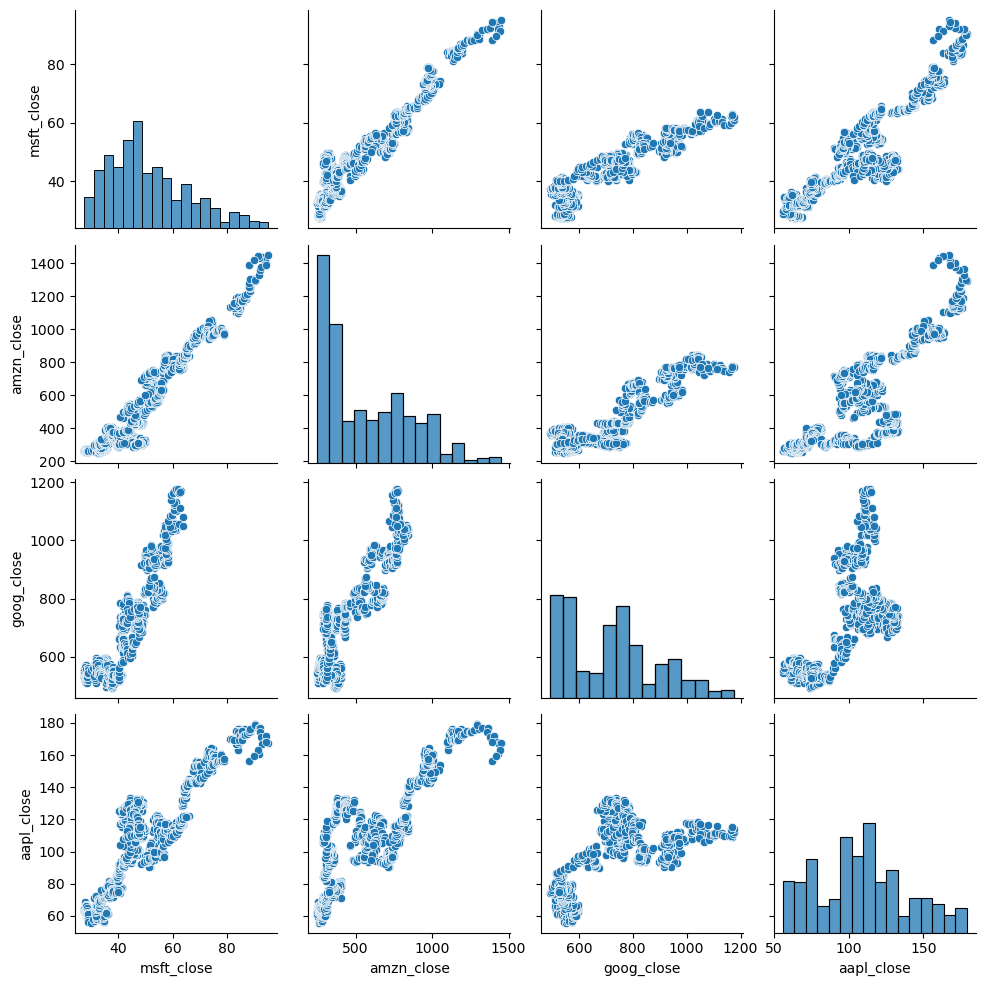

In [39]:
sns.pairplot(closing_price)

<Axes: >

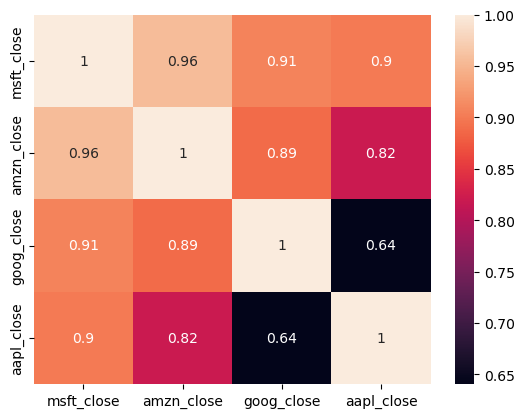

In [40]:
sns.heatmap(closing_price.corr(),annot=True)

One of the prominent observations derived from the scatterplot is the discernible linear trend visible in the data. Notably, there exists a direct relationship between the closing prices of Amazon and Microsoft, where an increase in Amazon's closing price corresponds to a concurrent rise in Microsoft's closing price. Additionally, a noteworthy correlation is observed between Microsoft and Google, with their prices mirroring each other at a strong correlation coefficient of 0.91:1. This pattern reinforces the narrative of major tech companies strategically mitigating the risk of technological downturns by engaging in similar investment strategies. These tech giants, including Amazon, Microsoft, and Google, appear to consistently hedge against potential disruptions by investing in the same startup companies. This shared investment approach could be a deliberate effort to avoid information discrepancies and ensure competitive alignment within the industry, showcasing a proactive stance towards innovation and risk management.

In [41]:
pct_change=pd.DataFrame()
pct_change['MSFT_close_pct_change']= msft['close'].pct_change()*100
pct_change['AMZN_close_pct_change']= amzn['close'].pct_change()*100
pct_change['GOOG_close_pct_change']= goog['close'].pct_change()*100
pct_change['AAPL_close_pct_change']= app['close'].pct_change()*100

In [42]:
pct_change

MSFT_close_pct_change  AMZN_close_pct_change  GOOG_close_pct_change  \
0                       NaN                    NaN                    NaN   
1                  1.125227              -1.809506               0.273968   
2                  0.071788               0.579293              -0.539295   
3                  0.538020               4.163123               1.829542   
4                  0.035676              -0.085353              -0.028211   
...                     ...                    ...                    ...   
1254              -0.789391              -4.196734                    NaN   
1255              -2.631021               2.874101                    NaN   
1256              -4.118544              -2.793804                    NaN   
1257               3.784091               3.801439                    NaN   
1258              -1.883280              -1.806160                    NaN   

      AAPL_close_pct_change  
0                       NaN  
1                  1.042235  
2                 -2.506658  
3                 -0.190297  
4                 -0.089934  
...                     ...  
1254               0.209043  
1255              -4.339015  
1256              -2.498442  
1257               4.179181  
1258              -2.140710  

[1259 rows x 4 columns]

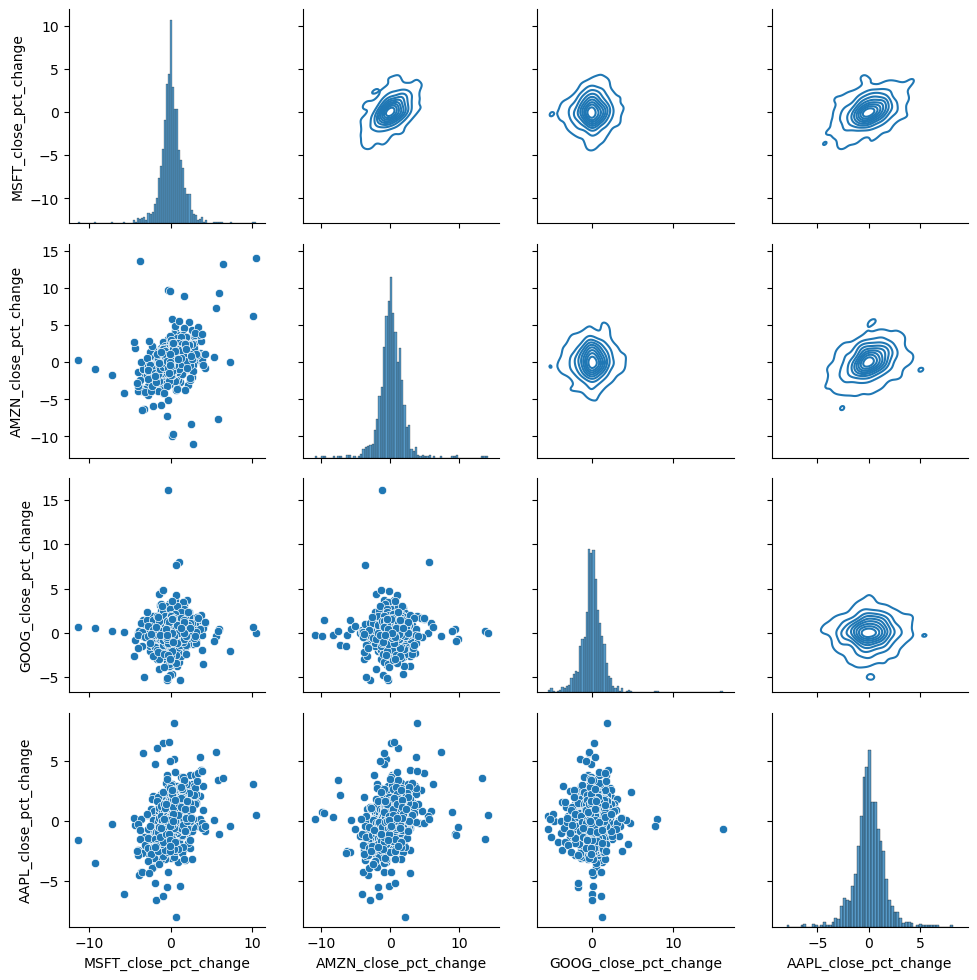

In [43]:
g=sns.PairGrid(pct_change)#map out the pair grid to include a kdeplot in the top left
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

<Axes: >

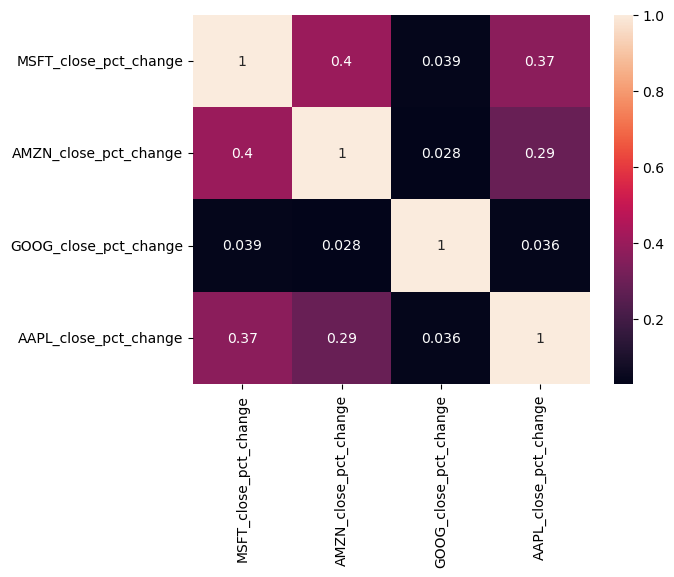

In [44]:
sns.heatmap(pct_change.corr(), annot=True)

After analyzing the price changes at the closing market, we can see the relationship of Amazon and Microsoft as the biggest takeaway in both the pairgrid and the kdeplot. As the closing price flutuates at almost a linear ratio, the percantage of that change is the same 40% of the time for Microsoft and Amazon.

Conclusion

Our exhaustive analysis of S&P 500 stocks, particularly focusing

on the tech sector, has yielded some fascinating insights. The journey through the stock performances of Apple, Amazon, Google, and Microsoft has revealed several key trends and patterns that are crucial for investors and market analysts.

Firstly, the historical price analysis highlighted the growth trajectories of these tech giants, especially through the mid to late 2010s. Amazon and Google, in particular, demonstrated a remarkable upward trend, showcasing their market dominance and steady growth.

The application of moving averages served as a vital tool in understanding market trends and stock volatility. This analysis showed that these stocks, while experiencing growth, also exhibited periods of stability, with closely packed moving averages indicating less volatility and a consensus in market sentiment.

Our foray into daily return analysis using Plotly provided an interactive and detailed view of stock performance. It became evident that stocks like Apple were not highly volatile, offering potential stability for investors. The analysis also suggested strategic buying and selling points, particularly on a quarterly basis, highlighting the importance of timing in stock trading.

The resampling analysis of Apple's stock presented clear evidence of consistent growth, especially post-2016. This insight is invaluable for understanding market dynamics and the impact of corporate decisions on stock performance.

Finally, the multivariate analysis unraveled the interconnected nature of these tech giants. The correlations between companies like Amazon and Microsoft pointed to parallel market strategies and investment behaviors, emphasizing the interconnectedness of the tech sector.

In conclusion, our analysis has not only provided a detailed overview of individual stock performances but also shed light on the broader market dynamics at play. The insights gained from this study are instrumental for investors looking to navigate the complexities of the stock market, particularly in the ever-evolving tech sector.